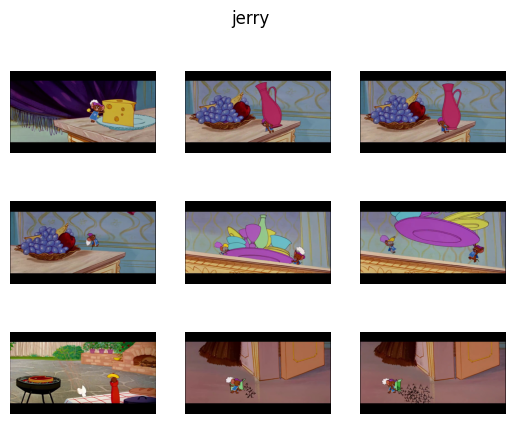

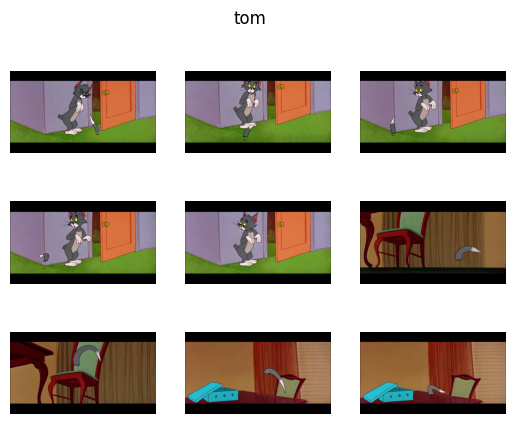

In [9]:
# Завдання класифікації зображень за допомогою згорткової нейромережі
# https://www.kaggle.com/datasets/balabaskar/tom-and-jerry-image-classification

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

path = 'tom_and_jerry/tom_and_jerry/'
categories = ['jerry', 'tom']
for category in categories:
    fig, _ = plt.subplots(3,3)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:9]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 3, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [21]:
X = []
y = []

for k, category in enumerate(categories):
    for f in os.listdir(path + category):
        image = cv2.imread(path + category + '/' + f)
        image = cv2.resize(image, (55, 32))  # Розмір, відповідний архітектурі
        X.append(image)
        y.append(k)

X = np.array(X, dtype="float32") / 255.0  # Нормалізація
y = np.array(y)

In [22]:
# Розподіл на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
y_train = to_categorical(y_train, len(categories))
y_test = to_categorical(y_test, len(categories))

In [23]:
# Перенесення навчання із MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 55, 3))
base_model.trainable = False  # Заморожуємо базову модель

C:\Users\User\AppData\Local\Temp\ipykernel_14472\240794453.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 55, 3))


In [24]:
# Додаємо власні шари
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(len(categories), activation='softmax')(x)

In [25]:
# Створюємо нову модель
model_tl = Model(inputs=base_model.input, outputs=predictions)

# Компіляція моделі
model_tl.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
# Навчання моделі
history_tl = model_tl.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=10)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5868 - loss: 0.7179 - val_accuracy: 0.8000 - val_loss: 0.4812
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7211 - loss: 0.4838 - val_accuracy: 0.8000 - val_loss: 0.4449
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6736 - loss: 0.5551 - val_accuracy: 0.9000 - val_loss: 0.4192
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6632 - loss: 0.5091 - val_accuracy: 0.9000 - val_loss: 0.4007
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7975 - loss: 0.4480 - val_accuracy: 0.9000 - val_loss: 0.3847
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8264 - loss: 0.4242 - val_accuracy: 0.9000 - val_loss: 0.3716
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7396 - loss: 0.4539 - val_accuracy: 0.9000 - val_loss: 0.3643
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8079 - loss: 0.4026 - val_accuracy: 0.9000 - val_loss: 0.3593
Ep

In [27]:
# Оцінка моделі
results_tl = model_tl.evaluate(X_test, y_test, verbose=0)
print('Transfer Learning - Losses:', results_tl[0])
print('Transfer Learning - Accuracy:', results_tl[1])

Transfer Learning - Losses: 0.3461381793022156
Transfer Learning - Accuracy: 0.8999999761581421


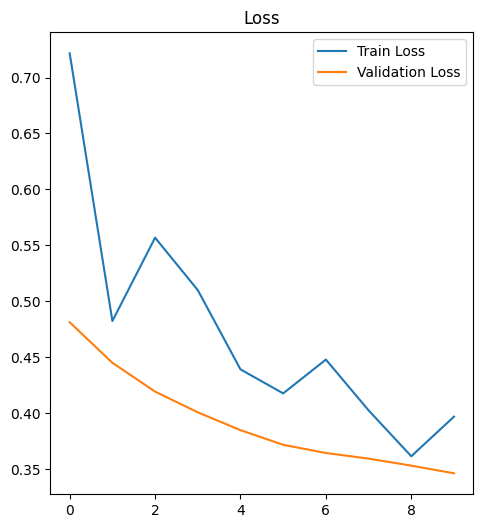

In [28]:
# Графік навчання
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_tl.history['loss'], label='Train Loss')
plt.plot(history_tl.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

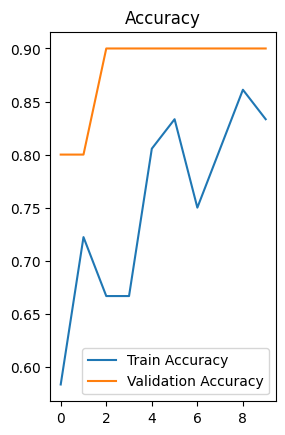

In [29]:
plt.subplot(1, 2, 2)
plt.plot(history_tl.history['accuracy'], label='Train Accuracy')
plt.plot(history_tl.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()